In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score





In [93]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [94]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

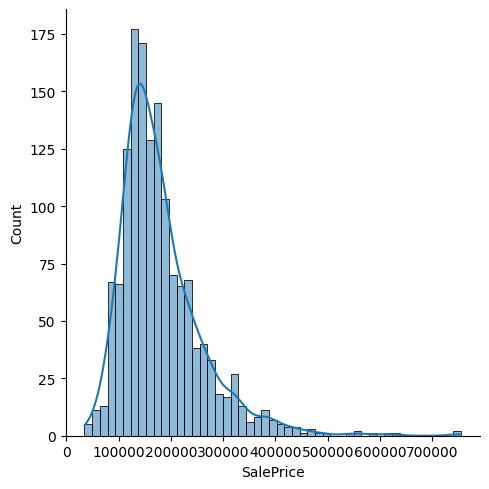

In [95]:
sns.displot(df_train["SalePrice"], kde=True)

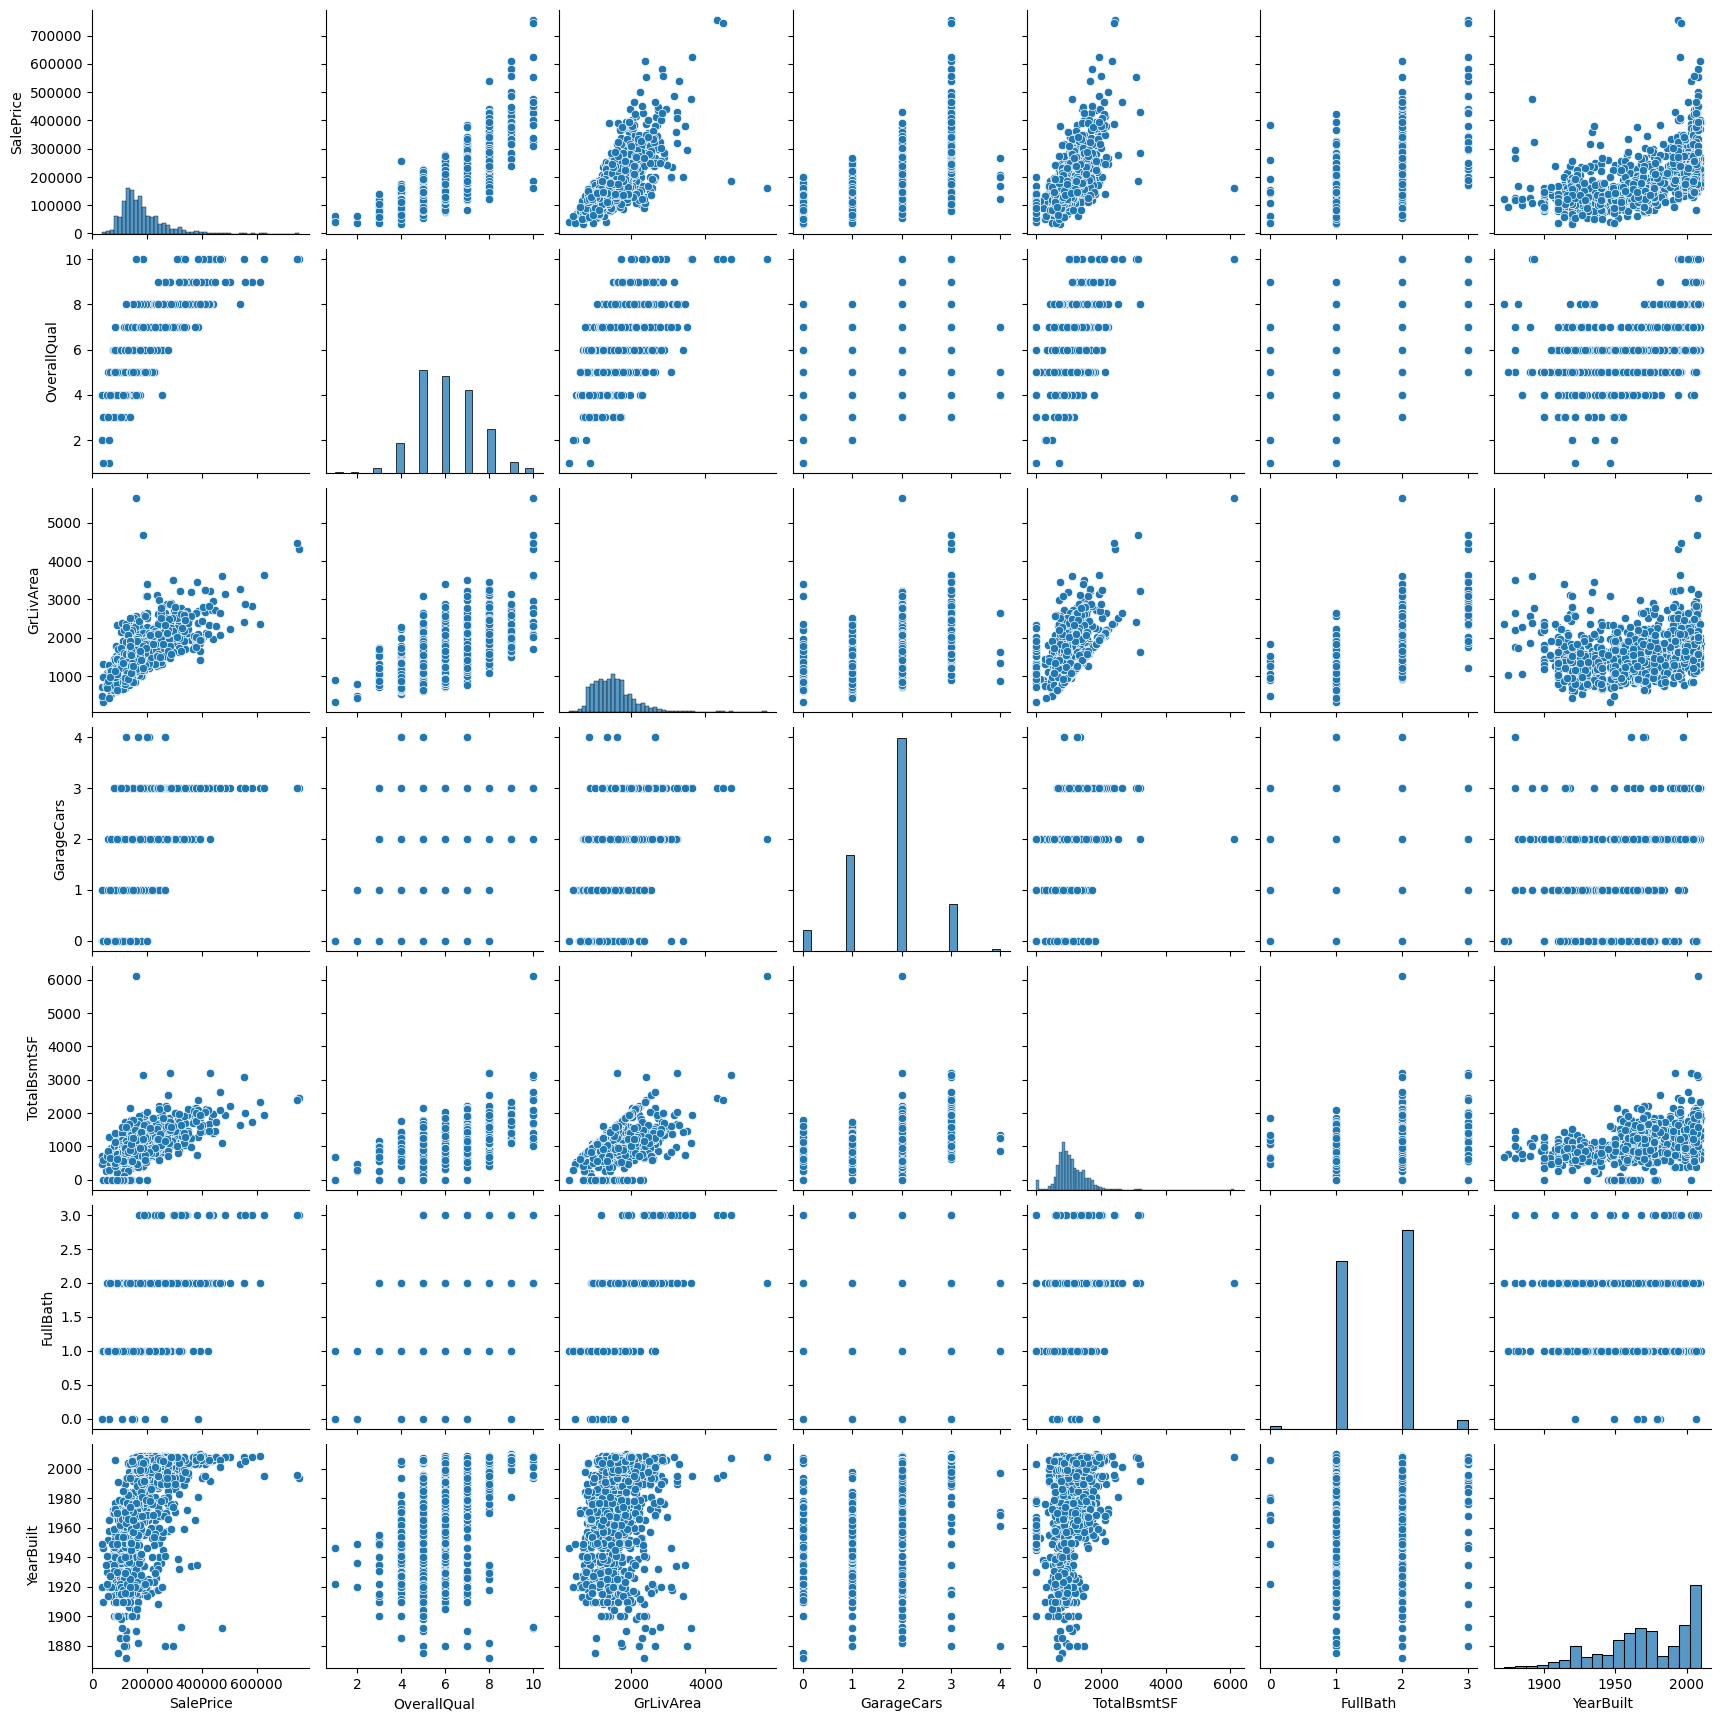

In [96]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])
plt.show()

## Обработка пропущенных значений категориальных признаков

In [97]:
total_missing = df_train.isnull().sum().sort_values(ascending=False)
percent_missing = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
# missing_columns_info = missing_columns_info[missing_columns_info > 0]
# missing_columns_info

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


In [98]:
df_train_non_object = df_train.loc[:, df_train.dtypes != "object"]
df_train_object = df_train.loc[:, df_train.dtypes == "object"]

df_train_object.columns[df_train_object.isnull().sum() > 100].to_list()

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [99]:
# df_train_object = df_train_object.drop(columns=['MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])
df_train_object.loc[:, 'Alley'] = df_train_object['Alley'].fillna("NA")
df_train_object['Alley']

0       NA
1       NA
2       NA
3       NA
4       NA
        ..
1455    NA
1456    NA
1457    NA
1458    NA
1459    NA
Name: Alley, Length: 1460, dtype: object

In [100]:
# df_train_object.isna().sum()

In [101]:
Y = df_train_non_object['SalePrice']
df_train_non_object = df_train_non_object.drop(columns=["SalePrice"])
df_train_non_object.fillna(df_train_non_object.median(), inplace=True)


In [102]:
df_train_object = df_train_object.apply(LabelEncoder().fit_transform)
df_train_object

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,1,3,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
1,3,1,1,3,3,0,2,0,24,1,...,1,1,4,4,2,3,4,4,8,4
2,3,1,1,0,3,0,4,0,5,2,...,1,1,4,4,2,3,4,4,8,4
3,3,1,1,0,3,0,0,0,6,2,...,5,2,4,4,2,3,4,4,8,0
4,3,1,1,0,3,0,2,0,15,2,...,1,1,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,1,3,3,0,4,0,8,2,...,1,1,4,4,2,3,4,4,8,4
1456,3,1,1,3,3,0,4,0,14,2,...,1,2,4,4,2,3,2,4,8,4
1457,3,1,1,3,3,0,4,0,6,2,...,1,1,4,4,2,3,0,2,8,4
1458,3,1,1,3,3,0,4,0,12,2,...,1,2,4,4,2,3,4,4,8,4


In [103]:
X = pd.concat([df_train_object, df_train_non_object], axis=1)
X.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,3,1,1,3,3,0,4,0,5,2,...,548,0,61,0,0,0,0,0,2,2008
1,3,1,1,3,3,0,2,0,24,1,...,460,298,0,0,0,0,0,0,5,2007
2,3,1,1,0,3,0,4,0,5,2,...,608,0,42,0,0,0,0,0,9,2008
3,3,1,1,0,3,0,0,0,6,2,...,642,0,35,272,0,0,0,0,2,2006
4,3,1,1,0,3,0,2,0,15,2,...,836,192,84,0,0,0,0,0,12,2008


In [104]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state=42)

In [105]:
model_liner = LinearRegression()
model_liner.fit(train_X, train_Y)
y_pred = model_liner.predict(test_X)

In [106]:
mse = mean_squared_error(test_Y, y_pred)
r2 = r2_score(test_Y, y_pred)

print(mse, r2)

1202411791.6990414 0.8432385065223984


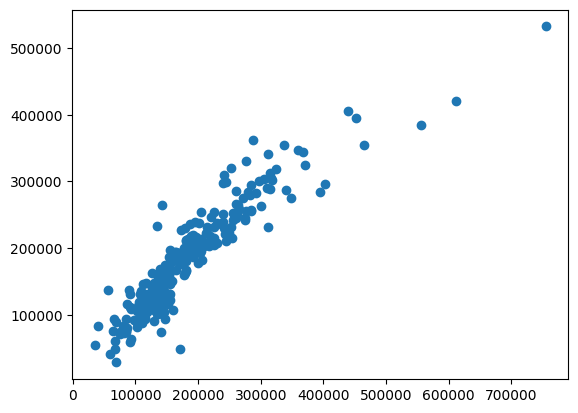

In [107]:
plt.scatter(test_Y, y_pred)
plt.show()